# Assignment for Programming for Data Analysis Due 22nd of November 2020

This assignment includes the following tasks:
1. Explanation of the overall purpose of numpy.random package in Python
2. Explanation of the use of the "Simple random data" and "Permutations" functions
3. Explanation of the use and purpose of at least five "Distributions" functions
4. Explanation of the use of seeds in generating pseudorandom numbers

The following references are used in this assignment <br>
[1] https://numpy.org/ <br>
[2] https://mathworld.wolfram.com/UniformDistribution.html <br>
[3] https://www.w3schools.com/python/numpy_random_permutation.asp <br>
[4] https://www.isrctn.com/editorial/retrieveFile/5cddbcff-b1f2-48a6-9ecd-2187e98adb60/36906 <br>
[5] Abbott, M.L (2016) Using Statistics in the Social and Health Sciences with SPSS and Excel. Wiley Publishers. <br>
[6] https://en.wikipedia.org/wiki/Binomial_distribution
[7] Kay, J., Coltheart, M., & Lesser, R. (1992). Psycholinguistic Assessments of Language Processing in
Aphasia,(PALPA): Auditory Processing. Lawrence Erlbaum Associates.
[8] https://stackoverflow.com/questions/32899463/how-can-i-overlay-two-graphs-in-seaborn

## Purpose of numpy.random package and use of simple random data 
The numpy.random package allows the user to produce pseudorandom numbers.  In order to do this the package uses a BitGenerator which creates sequences and a Generator that uses the sequences created by the BitGenerator to sample from different statistical distributions [1].   

In [1]:
import numpy as np
rng = np.random.default_rng()
# using default_rng() will get a new instance of a Generator with the default BitGenerator (PCG64). 
# it is then possible to call this Generator method to get samples from different distributions [1]. 

In [2]:
rng.integers(3, size=15)
# this will return 15 random integers from 0 up to but not inclusive of 3 

array([2, 1, 0, 2, 2, 1, 0, 0, 0, 1, 1, 2, 0, 1, 1], dtype=int64)

dtype is a data type object and it describes how the bytes in the fixed-size block of memory corresponding to an array item should be interpreted. The default value is np.int64. as seen above

In [3]:
rng.integers(5, size=(2, 4))
# generate a 2 x 4 array 

array([[2, 0, 1, 3],
       [0, 1, 3, 3]], dtype=int64)

In [4]:
rng.integers(0, [3, 20, 10])
# generate numbers with a lower bound of 0 and an three different upper bounds

array([2, 9, 3], dtype=int64)

In [5]:
rng.integers(1, [5, 15, 10, 20], size=(2, 4))
# generate a 2 x 4 array with lower bound of 1 and four different upper bounds

array([[ 3, 10,  1, 12],
       [ 2,  4,  2, 11]], dtype=int64)

In [6]:
x = rng.integers(100, size=100000)
# x is an array of 100000 numbers between 0 and up to but not including 100
x

array([28, 39, 54, ..., 78, 48, 42], dtype=int64)

In [7]:
import matplotlib.pyplot as plt
# library to create visualisations in Python including histograms

(array([ 9957., 10074.,  9967.,  9853., 10024., 10051., 10065.,  9982.,
        10115.,  9912.]),
 array([ 0. ,  9.9, 19.8, 29.7, 39.6, 49.5, 59.4, 69.3, 79.2, 89.1, 99. ]),
 <BarContainer object of 10 artists>)

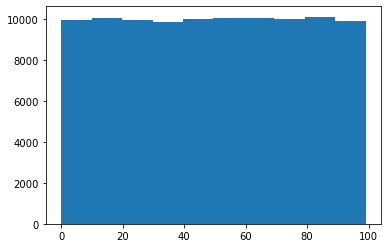

In [8]:
plt.hist(x)
# display a histogram of x

The distribution above represents a uniform distribution.  If we changed the size to 10 million in Line 6 above we would definitely see a clear retangular distribution with a straight line on top of the retangle and that indicates a distribution that has constant probability [2].
***

Above is an example of simple random data function that returns random integers from low (inclusive) to high (exclusive) [1] with a uniform distribution. It is also possible to use simple random data functions to generate a random sample from a given 1-D array. 

In [9]:
y = rng.choice(5, 10000, p=[0.1, 0, 0.3, 0.6, 0])
# Generate a non-uniform random sample from np.arange(5) of size 5
# p is the probabilities associated with each entry in the array. 
# If p is not given the sample assumes a uniform distribution over all entries in the array.

(array([1020.,    0.,    0.,    0.,    0.,    0., 2992.,    0.,    0.,
        5988.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <BarContainer object of 10 artists>)

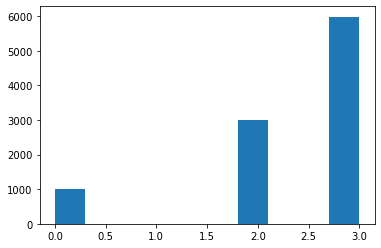

In [10]:
plt.hist(y)

Above we can see that this does not fit the uniform distribution as in the first histogram. <br>
***
We will look at other distributions further down the Jupyter Notebook. First we need to consider another set of functions available in numpy.random.Generator which are *permutations*. <br>
## Permutations
A permutation refers to an arrangement of elements. e.g. [3, 2, 1] is a permutation of [1, 2, 3] and vice-versa and the numpy.random module provides two methods for carrying out permutations: shuffle() and permutation() [3]. Using shuffle it is possible to modify a sequence in-place by shuffling its contents so that the order of sub-arrays is changed but their contents remains the same [1]. In a similar manner, the use of the permutation function will randomly permute a sequence, or return a permuted range and leaves the original array unchanged [3].

In [11]:
arr = np.arange(10)
rng.shuffle(arr)
# random 
arr

array([5, 0, 7, 6, 1, 8, 4, 9, 3, 2])

In [12]:
arr = np.arange(9).reshape((3, 3))
rng.shuffle(arr)
# random 3 x 3 array
arr

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

In [13]:
rng.permutation([1, 4, 9, 12, 15])
# makes a copy and randomly shuffles elements in the array

array([ 9,  4,  1, 12, 15])

## Distribution Functions
Below is an overview of five distribution functions: 
standard normal, binomial, chi square, F and t

### Standard Normal Distribution
Standard normal distribution is very common in social and health sciences research.  It can be referred to as a normal distribution curve because the histogram forms a curve when the top midpoints of the bars are joined together and there will be equal amounts of data to the left and the right of that midpoint [5]. A standard normal curve is also known as a z distribution with a mean = 0 and standard deviation = 1.0.  This is represented by the equation: <br>
$$z = \frac{x-u}{SD}$$ 
where z is the distribution, x is the raw score, u is the mean and SD is the standard deviation.

(array([3.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 2.000e+00, 3.000e+00,
        4.000e+00, 1.300e+01, 9.000e+00, 1.800e+01, 1.900e+01, 3.000e+01,
        4.000e+01, 4.300e+01, 7.800e+01, 8.300e+01, 9.800e+01, 1.030e+02,
        1.760e+02, 2.150e+02, 2.550e+02, 3.010e+02, 3.770e+02, 4.560e+02,
        5.720e+02, 6.030e+02, 7.380e+02, 8.240e+02, 9.980e+02, 1.089e+03,
        1.350e+03, 1.612e+03, 1.691e+03, 1.848e+03, 2.016e+03, 2.260e+03,
        2.339e+03, 2.669e+03, 2.863e+03, 2.918e+03, 3.205e+03, 3.224e+03,
        3.510e+03, 3.484e+03, 3.505e+03, 3.542e+03, 3.565e+03, 3.522e+03,
        3.539e+03, 3.436e+03, 3.370e+03, 3.072e+03, 2.967e+03, 2.884e+03,
        2.840e+03, 2.504e+03, 2.305e+03, 2.219e+03, 1.969e+03, 1.813e+03,
        1.630e+03, 1.398e+03, 1.235e+03, 1.090e+03, 9.390e+02, 7.690e+02,
        6.910e+02, 5.670e+02, 4.710e+02, 3.700e+02, 3.540e+02, 2.720e+02,
        2.270e+02, 1.790e+02, 1.250e+02, 1.110e+02, 9.500e+01, 6.600e+01,
        4.600e+01, 4.200e+01, 3.400e+0

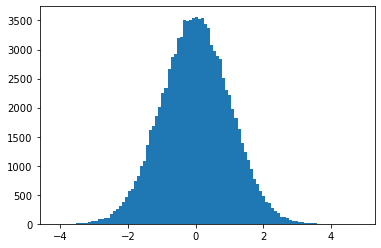

In [14]:
import seaborn as sns
sn = rng.standard_normal(100000)
plt.hist(sn, bins=100)

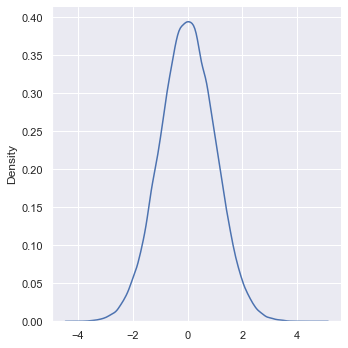

In [15]:
sns.set_theme()
sns.displot(sn, kind="kde")

### Binomial distribution
The binomial distribution with parameters n and p is the discrete probability distribution of the number of successes in a sequence of n independent experiments, each asking a yes–no question i.e. *will the coin land on heads?*, and each with its own Boolean-valued outcome: success (with probability p) or failure (with probability q = 1 − p) [6]. The distribution will depend on the number of trials in the experiment and the probably of sucess or failure.  

In [16]:
rng = np.random.default_rng()
n, p = 10, .5
# number of trials, probability of each trial
b = rng.binomial(n, p, 2000)
# result of flipping a coin 10 times, tested 2000 times

(array([  1.,  17.,  99., 234., 409., 484., 405., 236.,  96.,  19.]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
 <BarContainer object of 10 artists>)

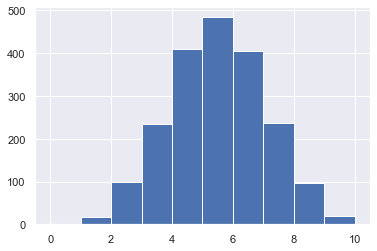

In [17]:
plt.hist(b)

### Chi Square Distribution
The chi square distribution is actually several distributions that vary with the size of the sample, and the shape of the distribution is different depending on the degrees of freedom (df) [6]. Degrees of freedom represent the restrictions on the values when we are estimating a population parameter. So technically df identify how many values are free to vary when making the parameter estimate. These differences related to df will be demonstrated below. Chi square is a statistical procedure that examines frequency counts.

In [18]:
chi = np.random.default_rng().chisquare(2,400)
# chi # very big!

(array([197.,  94.,  47.,  29.,  14.,   9.,   4.,   2.,   3.,   1.]),
 array([3.08414558e-03, 1.27015256e+00, 2.53722098e+00, 3.80428940e+00,
        5.07135782e+00, 6.33842624e+00, 7.60549466e+00, 8.87256307e+00,
        1.01396315e+01, 1.14066999e+01, 1.26737683e+01]),
 <BarContainer object of 10 artists>)

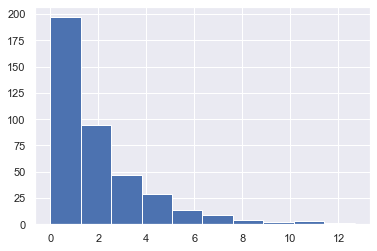

In [19]:
plt.hist(chi)

If we change the df we can see the different distributions

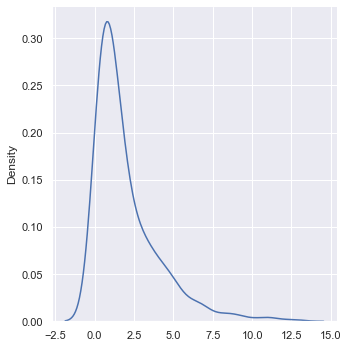

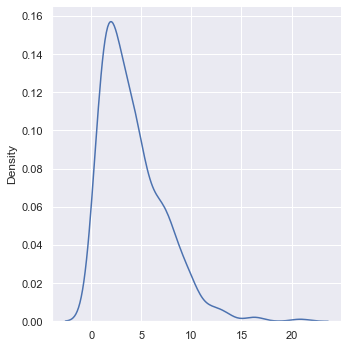

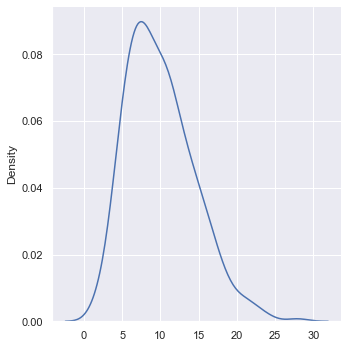

In [23]:
chi4 = np.random.default_rng().chisquare(4,400)
chi10 = np.random.default_rng().chisquare(10,400)
def plotter():
    sns.displot(chi, kind="kde")
    sns.displot(chi4, kind="kde")
    sns.displot(chi10, kind="kde")
plotter()

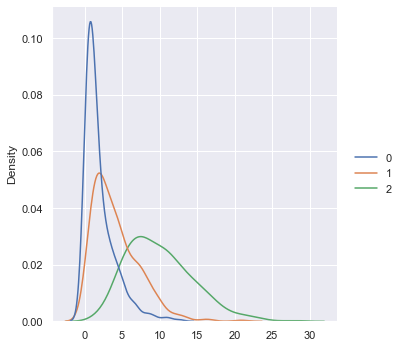

In [27]:
# pj
all_plots = [chi, chi4, chi10]
all_labels = ["df = 2", "df = 4", "df = 10"]
sns.displot(all_plots, kind="kde", legend = "full")

### F distribution
F distribution is a sampling distribution of variances rather than means (the latter is the distribution seen in a normal standard distribution). Variance is the average squared distance of the scores in a distribution from the mean and is the squared standard devication. F distribution appears to be a normal distribution that has skewed to the right, this is because variances are never negative values [5]. 

In [20]:
dfnum = 1. # between group degrees of freedom
dfden = 48. # within groups degrees of freedom
fdis = np.random.default_rng().f(dfnum, dfden, 1000)

In [ ]:
np.sort(fdis)[-10]
# produces the lower bound for the the top 10%

In [ ]:
plt.hist(fdis)


### T Distribution
The T distribution is the same as the Z distribution in terms of being a standard normal distribution. The T distribution is typically based on small sample sizes and the varies by sample size. So larger the sample size the more the T distribution looks like a Z distribution with a large hump in the middle and smaller tails on both sides (similiar to the standard normal distibution histogram shown above) [5].  A smaller sample and the T distribution has fewer comparision values and it appears flatter (as shown below).<br>
The data below is taken from a study I was involved with and I've decided to use it instead of the data in the numpy documentation to help my learning [1]. However, it is important to note that the t test is based on an assumption that the data comes from a Normal distribution [1] this has not been tested here. <br>
There were 9 people with acquired communication disorders and this is a test of spoken word comprehension called PALPA 47.  There are 40 items in the test and on a set of control subjects the mean score was 39.29 and the std dev is 1.07. So is the sample mean within 95% of the control mean?

In [ ]:
intake = np.array([36, 28, 40, 31, 39, 27, 40, 33, 34])  
s = np.random.default_rng().standard_t(8, size = 32)
# there are 9 participants so that means 8 degrees of freedom
np.mean(intake)

In [ ]:
intake.std(ddof=1)

In [ ]:
t = (np.mean(intake)-39.29)/(intake.std(ddof=1)/np.sqrt(len(intake)))
h = plt.hist(s, bins=10, density=True)

In [ ]:
np.sum(s<t) / float(len(s))

The p value is 0.0625 

## Use of seeds in the generation of pseudorandom numbers in Python